<a href="https://colab.research.google.com/github/Rafae1130/machine-learning-projects/blob/main/gender_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d ashishjangra27/gender-recognition-200k-images-celeba

 99% 1.31G/1.32G [00:50<00:00, 24.2MB/s]
100% 1.32G/1.32G [00:50<00:00, 27.8MB/s]


In [5]:
!unzip gender-recognition-200k-images-celeba.zip

Streaming output truncated to the last 5000 lines.
  inflating: Dataset/Validation/Male/189674.jpg  
  inflating: Dataset/Validation/Male/189675.jpg  
  inflating: Dataset/Validation/Male/189676.jpg  
  inflating: Dataset/Validation/Male/189679.jpg  
  inflating: Dataset/Validation/Male/189681.jpg  
  inflating: Dataset/Validation/Male/189684.jpg  
  inflating: Dataset/Validation/Male/189688.jpg  
  inflating: Dataset/Validation/Male/189689.jpg  
  inflating: Dataset/Validation/Male/189691.jpg  
  inflating: Dataset/Validation/Male/189692.jpg  
  inflating: Dataset/Validation/Male/189693.jpg  
  inflating: Dataset/Validation/Male/189694.jpg  
  inflating: Dataset/Validation/Male/189695.jpg  
  inflating: Dataset/Validation/Male/189696.jpg  
  inflating: Dataset/Validation/Male/189697.jpg  
  inflating: Dataset/Validation/Male/189698.jpg  
  inflating: Dataset/Validation/Male/189702.jpg  
  inflating: Dataset/Validation/Male/189704.jpg  
  inflating: Dataset/Validation/Male/189705.jpg  

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Model

In [7]:
from tensorflow.python.keras.backend import batch_set_value
train_datagen=ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
  )
test_datagen=ImageDataGenerator(rescale=1.0/255)
train_generator=train_datagen.flow_from_directory('Dataset/Train/',
                                                  batch_size=256,
                                                  class_mode='binary',
                                                  target_size=(64,64))
validation_generator=test_datagen.flow_from_directory('Dataset/Validation/',
                                                      batch_size=256,
                                                      class_mode='binary',
                                                      target_size=(64,64))


                                            

Found 160000 images belonging to 2 classes.
Found 22598 images belonging to 2 classes.


In [8]:
len(train_generator)

625

In [9]:
from tensorflow.keras.optimizers import Adam
model = tf.keras.models.Sequential([
    # 1st conv
  tf.keras.layers.Conv2D(96, (11,11),strides=(4,4), activation='relu', input_shape=(64, 64, 3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2,2)),
    # 2nd conv
  tf.keras.layers.Conv2D(256, (11,11),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
     # 3rd conv
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
    # 4th conv
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
    # 5th Conv
  tf.keras.layers.Conv2D(256, (3, 3), strides=(1, 1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2, 2)),
  # To Flatten layer
  tf.keras.layers.Flatten(),
  # To FC layer 1
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  #To FC layer 2
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1, activation='sigmoid')
  ])
model.compile(
    optimizer=Adam(lr=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
   )
hist = model.fit_generator(generator=train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=256,
                    validation_steps=256,
                    epochs=50)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/50
256/256 [==============================] - 196s 708ms/step - loss: 0.8592 - accuracy: 0.6318 - val_loss: 0.5670 - val_accuracy: 0.6749
Epoch 2/50
256/256 [==============================] - 156s 610ms/step - loss: 0.4961 - accuracy: 0.7646
Epoch 3/50
256/256 [==============================] - 155s 605ms/step - loss: 0.4412 - accuracy: 0.7980
Epoch 4/50
256/256 [==============================] - 155s 605ms/step - loss: 0.3683 - accuracy: 0.8402
Epoch 5/50
256/256 [==============================] - 154s 600ms/step - loss: 0.3289 - accuracy: 0.8579
Epoch 6/50
256/256 [==============================] - 154s 601ms/step - loss: 0.3139 - accuracy: 0.8670
Epoch 7/50
256/256 [==============================] - 154s 601ms/step - loss: 0.2866 - accuracy: 0.8784
Epoch 8/50
256/256 [==============================] - 153s 598ms/step - loss: 0.2701 - accuracy: 0.8876
Epoch 9/50
256/256 [==============================] - 154s 603ms/step - loss: 0.2526 - accuracy: 0.8949
Epoch 10/50
256/256 [=

[0.]
is a female


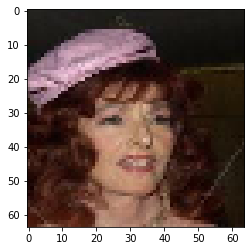

In [31]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
path='Dataset/Test/Female/160001.jpg'
img=image.load_img(path, target_size=(64,64))
x1=image.img_to_array(img)
x=np.expand_dims(x1,axis=0)

classes=model.predict(x, batch_size=1)
print(classes[0])
if classes[0]>0.5:
  print('is a man')
else:
  print('is a female')

plt.imshow(img)

In [20]:
np.shape(x1)

(64, 64, 3)

In [23]:
np.set_printoptions(threshold=np.inf)
x1

array([[[ 35.,  34.,  30.],
        [ 36.,  35.,  31.],
        [ 37.,  36.,  32.],
        [ 37.,  36.,  32.],
        [ 36.,  35.,  31.],
        [ 35.,  34.,  30.],
        [ 34.,  33.,  31.],
        [ 33.,  32.,  30.],
        [ 32.,  31.,  29.],
        [ 34.,  33.,  31.],
        [ 34.,  33.,  31.],
        [ 34.,  33.,  31.],
        [ 31.,  33.,  32.],
        [ 30.,  32.,  31.],
        [ 31.,  33.,  32.],
        [ 29.,  31.,  30.],
        [ 30.,  32.,  31.],
        [ 32.,  31.,  27.],
        [ 31.,  30.,  26.],
        [ 30.,  29.,  25.],
        [ 30.,  29.,  25.],
        [ 31.,  30.,  26.],
        [ 32.,  31.,  27.],
        [ 29.,  30.,  25.],
        [ 29.,  30.,  25.],
        [ 29.,  30.,  25.],
        [ 29.,  30.,  25.],
        [ 28.,  29.,  24.],
        [ 26.,  27.,  22.],
        [ 32.,  31.,  27.],
        [ 32.,  31.,  27.],
        [ 30.,  29.,  25.],
        [ 31.,  30.,  26.],
        [ 29.,  28.,  24.],
        [ 28.,  27.,  23.],
        [ 29.,  28.,

In [27]:
np.shape(x)


(1, 64, 64, 3)

In [26]:
x

array([[[[ 35.,  34.,  30.],
         [ 36.,  35.,  31.],
         [ 37.,  36.,  32.],
         [ 37.,  36.,  32.],
         [ 36.,  35.,  31.],
         [ 35.,  34.,  30.],
         [ 34.,  33.,  31.],
         [ 33.,  32.,  30.],
         [ 32.,  31.,  29.],
         [ 34.,  33.,  31.],
         [ 34.,  33.,  31.],
         [ 34.,  33.,  31.],
         [ 31.,  33.,  32.],
         [ 30.,  32.,  31.],
         [ 31.,  33.,  32.],
         [ 29.,  31.,  30.],
         [ 30.,  32.,  31.],
         [ 32.,  31.,  27.],
         [ 31.,  30.,  26.],
         [ 30.,  29.,  25.],
         [ 30.,  29.,  25.],
         [ 31.,  30.,  26.],
         [ 32.,  31.,  27.],
         [ 29.,  30.,  25.],
         [ 29.,  30.,  25.],
         [ 29.,  30.,  25.],
         [ 29.,  30.,  25.],
         [ 28.,  29.,  24.],
         [ 26.,  27.,  22.],
         [ 32.,  31.,  27.],
         [ 32.,  31.,  27.],
         [ 30.,  29.,  25.],
         [ 31.,  30.,  26.],
         [ 29.,  28.,  24.],
         [ 28.

In [28]:
np.shape(images)

(1, 64, 64, 3)

In [29]:
images

array([[[[ 35.,  34.,  30.],
         [ 36.,  35.,  31.],
         [ 37.,  36.,  32.],
         [ 37.,  36.,  32.],
         [ 36.,  35.,  31.],
         [ 35.,  34.,  30.],
         [ 34.,  33.,  31.],
         [ 33.,  32.,  30.],
         [ 32.,  31.,  29.],
         [ 34.,  33.,  31.],
         [ 34.,  33.,  31.],
         [ 34.,  33.,  31.],
         [ 31.,  33.,  32.],
         [ 30.,  32.,  31.],
         [ 31.,  33.,  32.],
         [ 29.,  31.,  30.],
         [ 30.,  32.,  31.],
         [ 32.,  31.,  27.],
         [ 31.,  30.,  26.],
         [ 30.,  29.,  25.],
         [ 30.,  29.,  25.],
         [ 31.,  30.,  26.],
         [ 32.,  31.,  27.],
         [ 29.,  30.,  25.],
         [ 29.,  30.,  25.],
         [ 29.,  30.,  25.],
         [ 29.,  30.,  25.],
         [ 28.,  29.,  24.],
         [ 26.,  27.,  22.],
         [ 32.,  31.,  27.],
         [ 32.,  31.,  27.],
         [ 30.,  29.,  25.],
         [ 31.,  30.,  26.],
         [ 29.,  28.,  24.],
         [ 28.